# `Analyze the efficiency and numerical stability`

In [1]:
import torch
import time

In [2]:
def compute_function(x):
    return torch.sin(x) + torch.cos(x)

In [3]:
def compute_gradients_autograd(x):
    x.requires_grad = True
    y = compute_function(x)
    y.backward()
    return x.grad

In [4]:
def compute_gradients_manual(x):
    x.grad = None
    y = compute_function(x)
    grad = torch.ones_like(x)
    grad_function = torch.autograd.grad(y, x, grad_outputs=grad, create_graph=True)[0]
    return grad_function

In [5]:
def conduct_experiments():
    grad_gradients_autograd = []
    time_gradients_autograd = []

    grad_gradients_manual = []
    time_gradients_manual = []
    x = torch.tensor([1000000000000000000.], requires_grad=True)

    
    gradients_autograd = compute_gradients_autograd(x)
    grad_gradients_autograd.append(gradients_autograd.item())
    for i in range(1, 100, 1):
        start_time = time.perf_counter()
        gradients_autograd = compute_gradients_autograd(gradients_autograd)
        end_time = time.perf_counter()

        grad_gradients_autograd.append(gradients_autograd.item())
        time_gradients_autograd.append(end_time - start_time)

    
    gradients_manual = compute_gradients_manual(x)
    grad_gradients_manual.append(gradients_manual.item())
    for i in range(1, 100, 1):
        start_time = time.perf_counter()
        gradients_manual = compute_gradients_manual(gradients_manual)
        end_time = time.perf_counter()
        
        grad_gradients_manual.append(gradients_manual.item())   
        time_gradients_manual.append(end_time - start_time)

    return grad_gradients_autograd, grad_gradients_manual, time_gradients_autograd, time_gradients_manual

grad_gradients_autograd, grad_gradients_manual, time_gradients_autograd, time_gradients_manual = conduct_experiments()

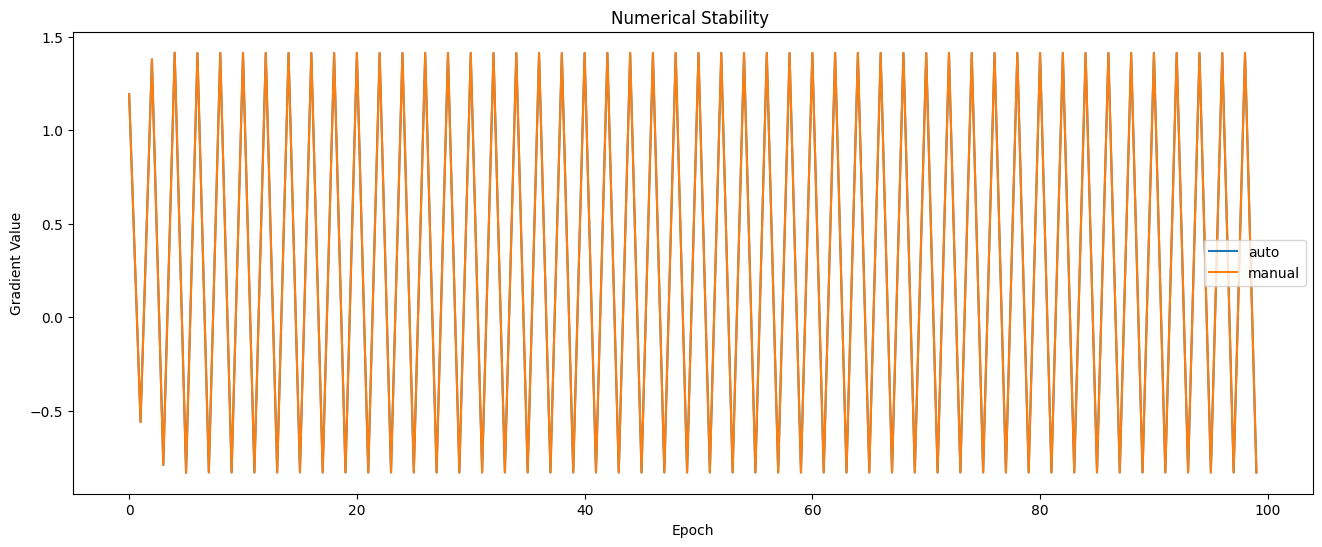

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6,))
plt.plot(grad_gradients_autograd, label='auto')
plt.plot(grad_gradients_manual, label='manual')
plt.xlabel('Epoch')
plt.ylabel('Gradient Value')
plt.title('Numerical Stability ')
plt.legend()
plt.show()

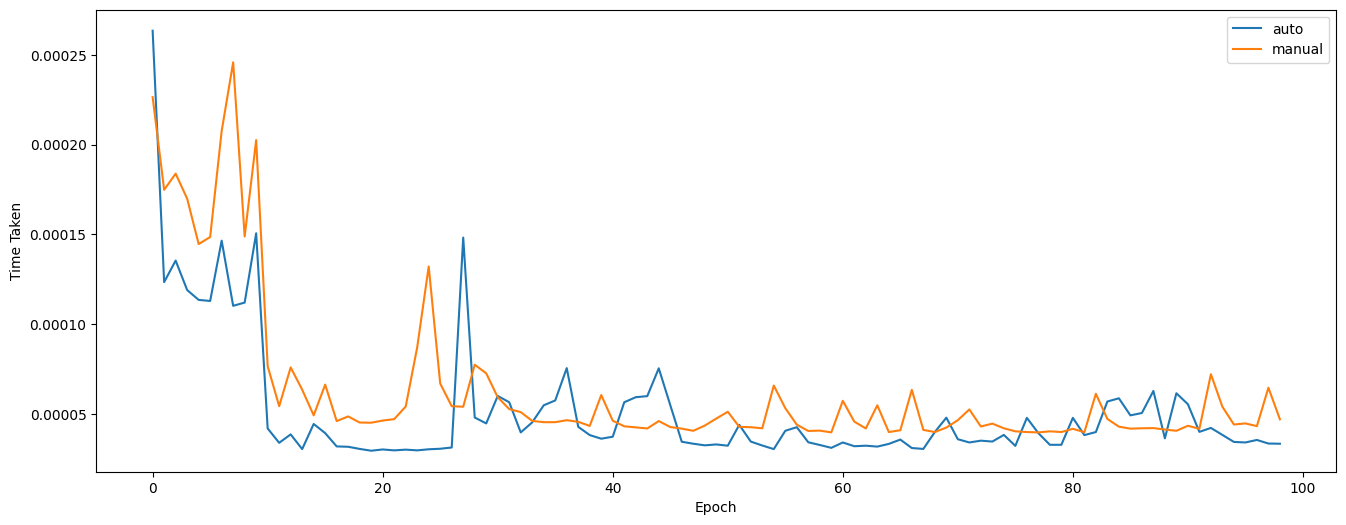

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6,))
plt.plot(time_gradients_autograd, label='auto')
plt.plot(time_gradients_manual, label='manual')
plt.xlabel('Epoch')
plt.ylabel('Time Taken')
plt.legend()
plt.show()

# `The efficiency and numerical stability of Autograd-based `

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import time

In [9]:
class Network0(nn.Module):
    def __init__(self):
        super(Network0, self).__init__()
        self.fc1 = nn.Linear(10, 20)
        self.fc2 = nn.Linear(20, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [10]:
class Network1(nn.Module):
    def __init__(self):
        super(Network1, self).__init__()
        self.fc1 = nn.Linear(10, 20)
        self.fc2 = nn.Linear(20, 30)
        self.fc3 = nn.Linear(30, 40)
        self.fc4 = nn.Linear(40, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

In [11]:
class Network2(nn.Module):
    def __init__(self):
        super(Network2, self).__init__()
        self.fc1 = nn.Linear(10, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 64)
        self.fc4 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

In [12]:
def train_model(batch_size, learning_rate, Network):
    network_classes = {
        0: Network0(),
        1: Network1(),
        2: Network2(),
    }

    model = network_classes[Network]
    
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    input_data = torch.randn(batch_size, 10)
    labels = torch.randn(batch_size, 1)
    
    loss_value = []
    time_value = []
    for epoch in range(100):
        start_time = time.perf_counter()
        outputs = model(input_data)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_value.append(loss.item())
        stop_time = time.perf_counter()
        time_value.append(stop_time - start_time)
    return loss_value, model, time_value

## `Experiment 1: Varying Batch Sizes`

In [13]:
batch_sizes = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576]
learning_rate = 0.01

loss_values = []
time_values = []
for batch_size in batch_sizes:
    loss, model, times = train_model(batch_size, learning_rate, 0)
    loss_values.append(loss)
    time_values.append(times)

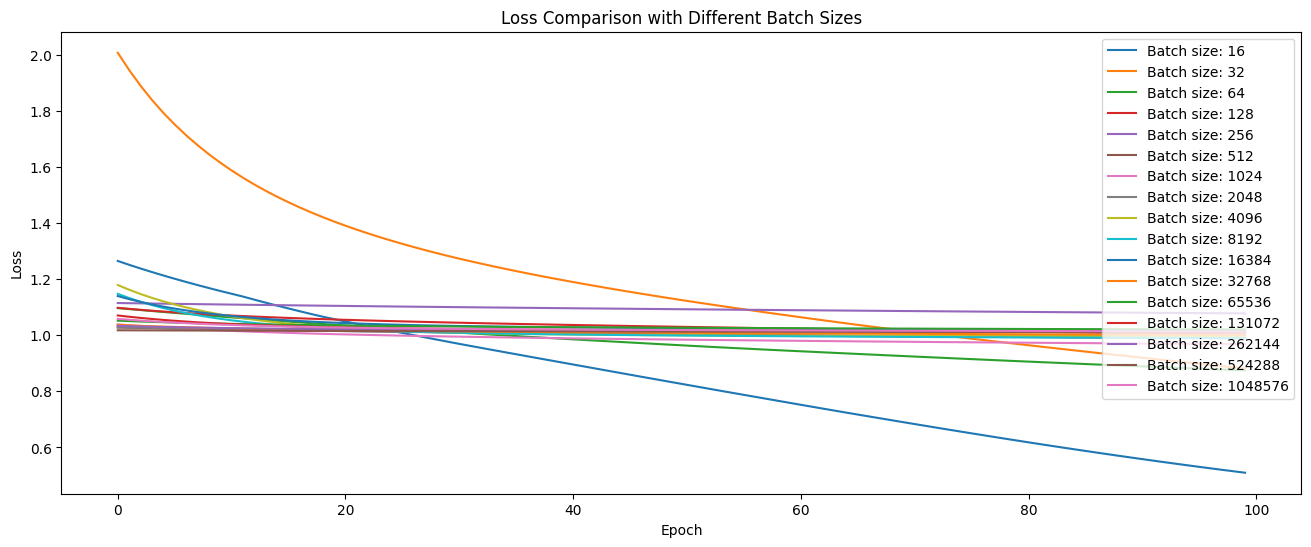

In [14]:
plt.figure(figsize=(16, 6))
for i in range(0, len(batch_sizes)):
    plt.plot(loss_values[i], label=f"Batch size: {batch_sizes[i]}")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Comparison with Different Batch Sizes')
plt.legend()
plt.show()

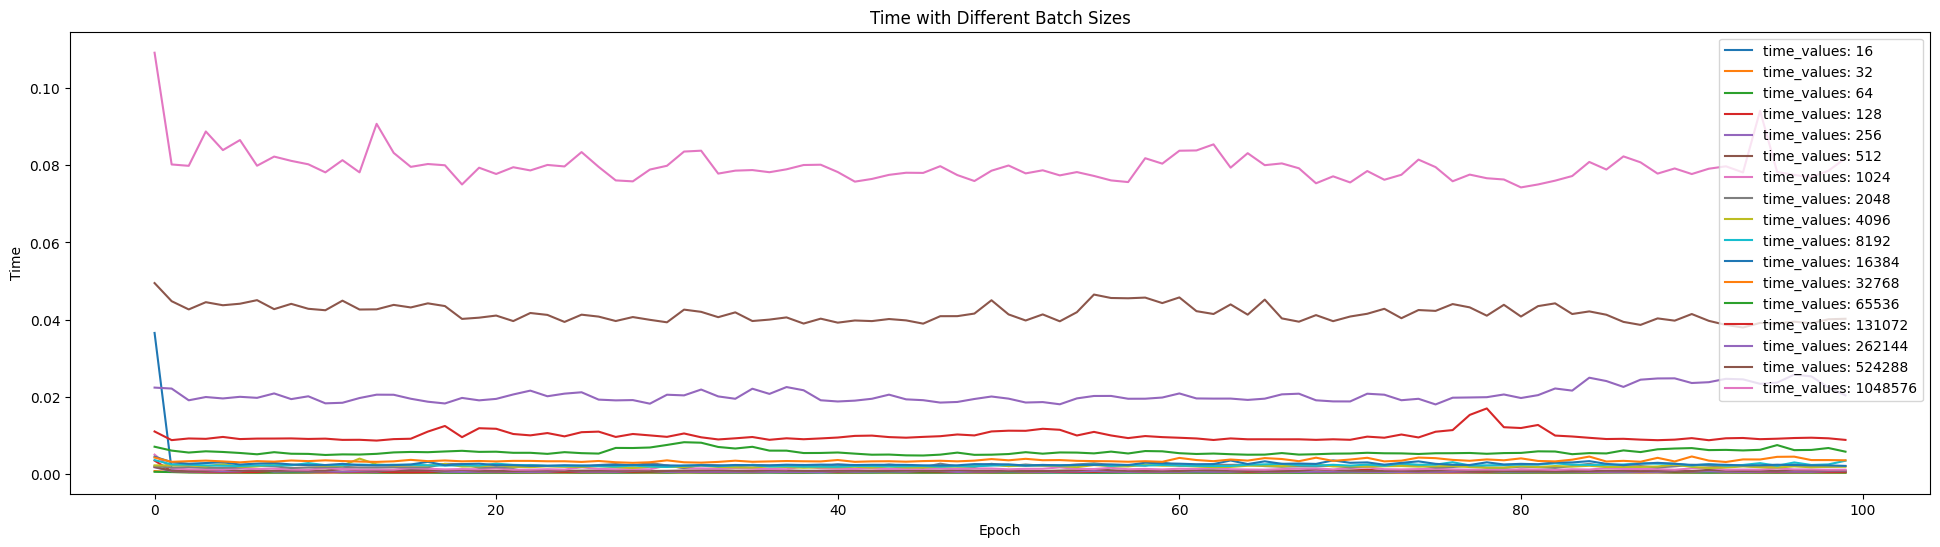

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 6))

for i in range(len(batch_sizes)):
    plt.plot(time_values[i], label=f"time_values: {batch_sizes[i]}")

plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Time with Different Batch Sizes')
plt.legend()
plt.show()

## `Experiment 2: Varying learning rate`

In [16]:
batch_size = 32
learning_rates = [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

loss_values = []
time_values = []
loss_values_with_learning_rate = []
for learning_rate in learning_rates:
    loss, model, times = train_model(batch_size, learning_rate, 0)
    loss_values.append(loss)
    time_values.append(times)

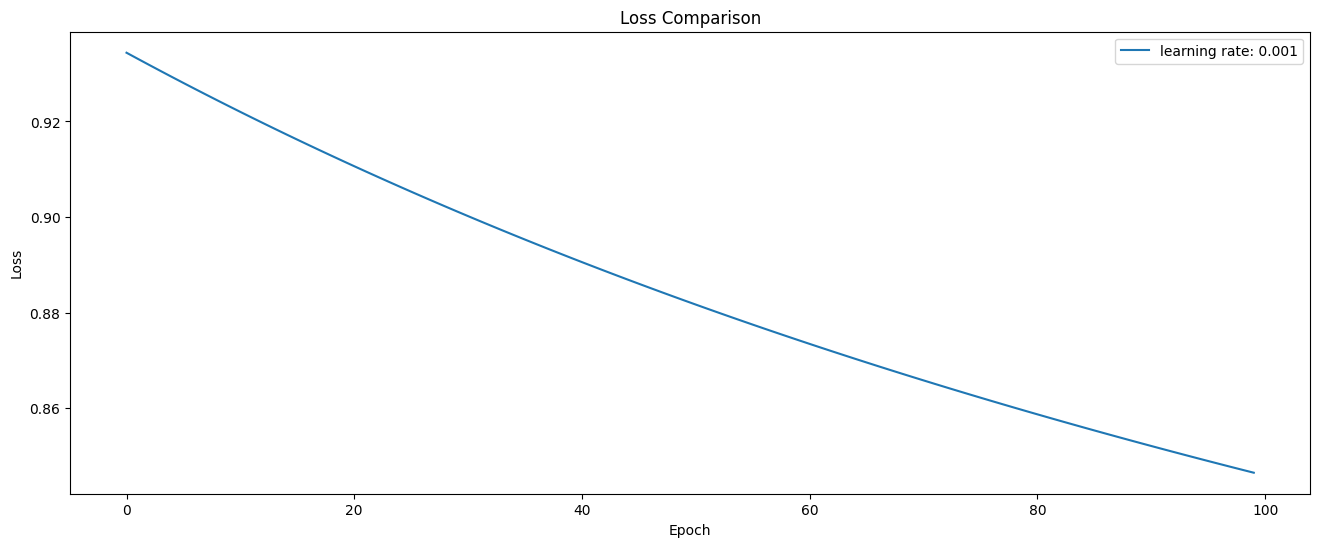

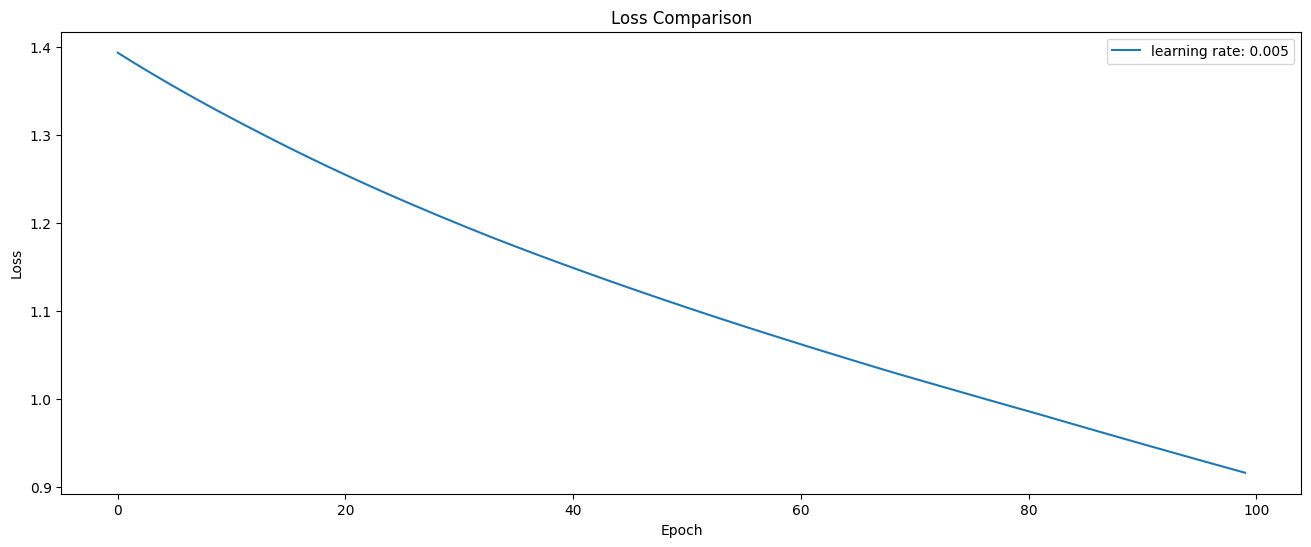

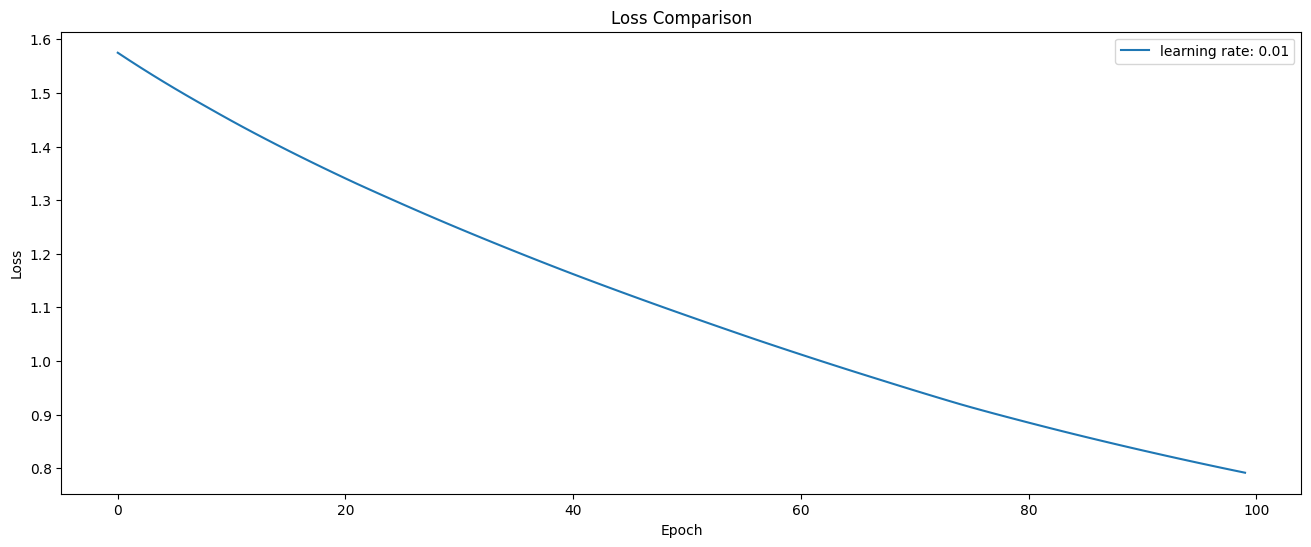

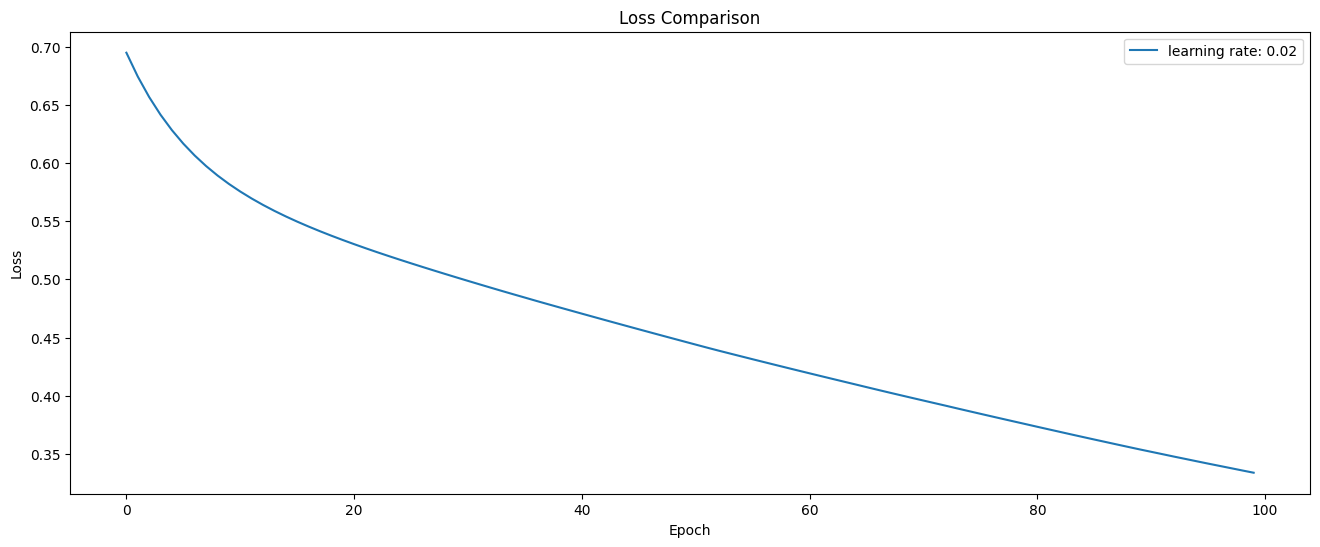

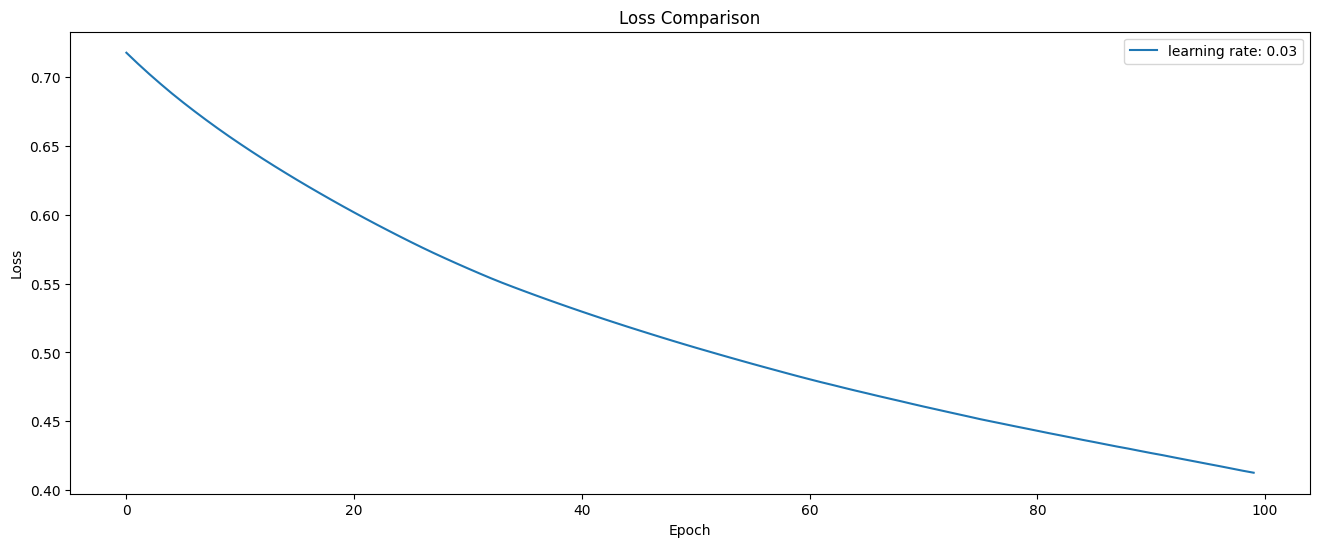

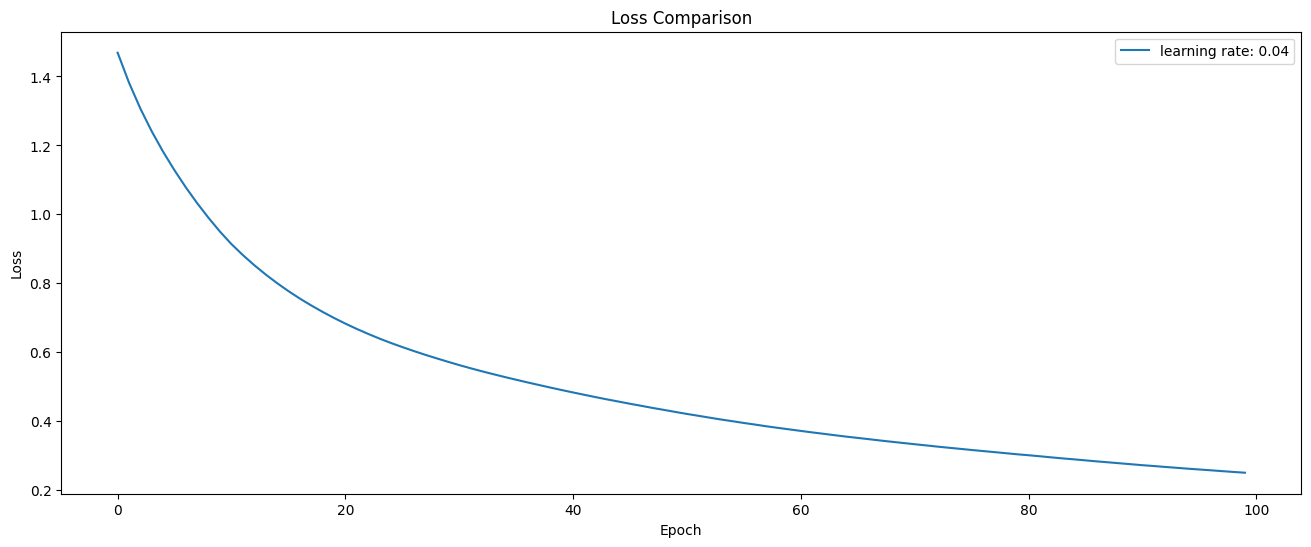

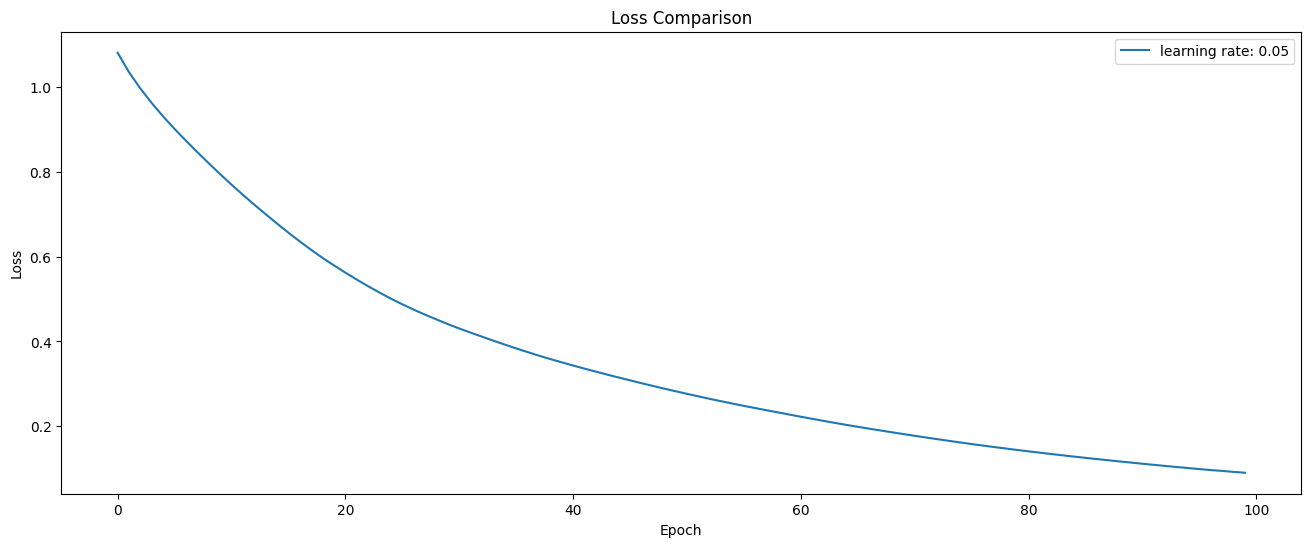

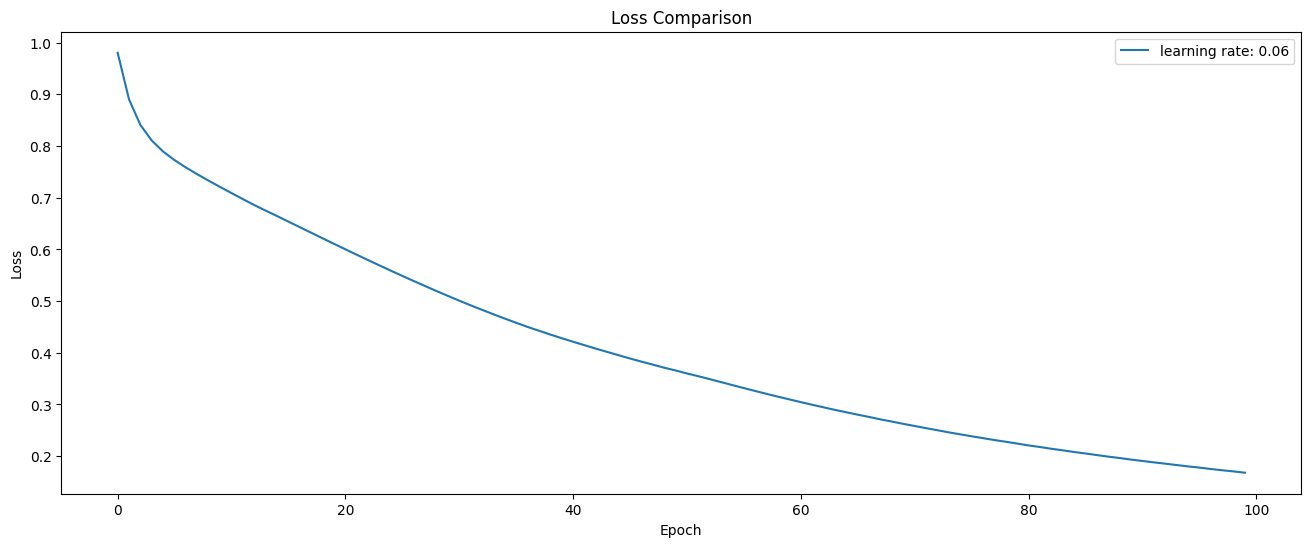

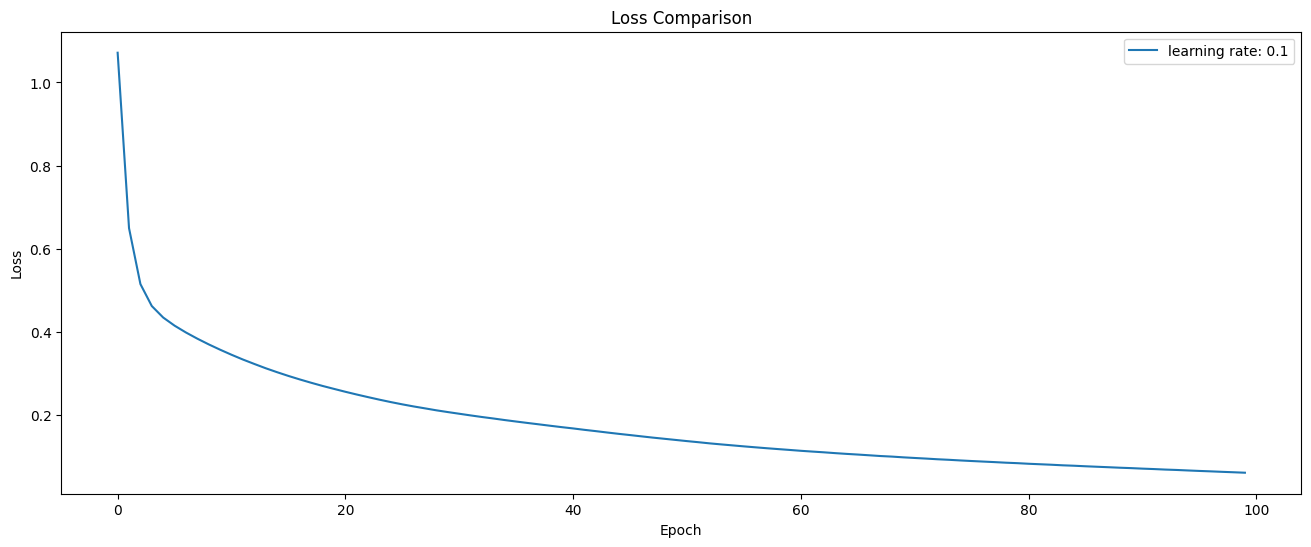

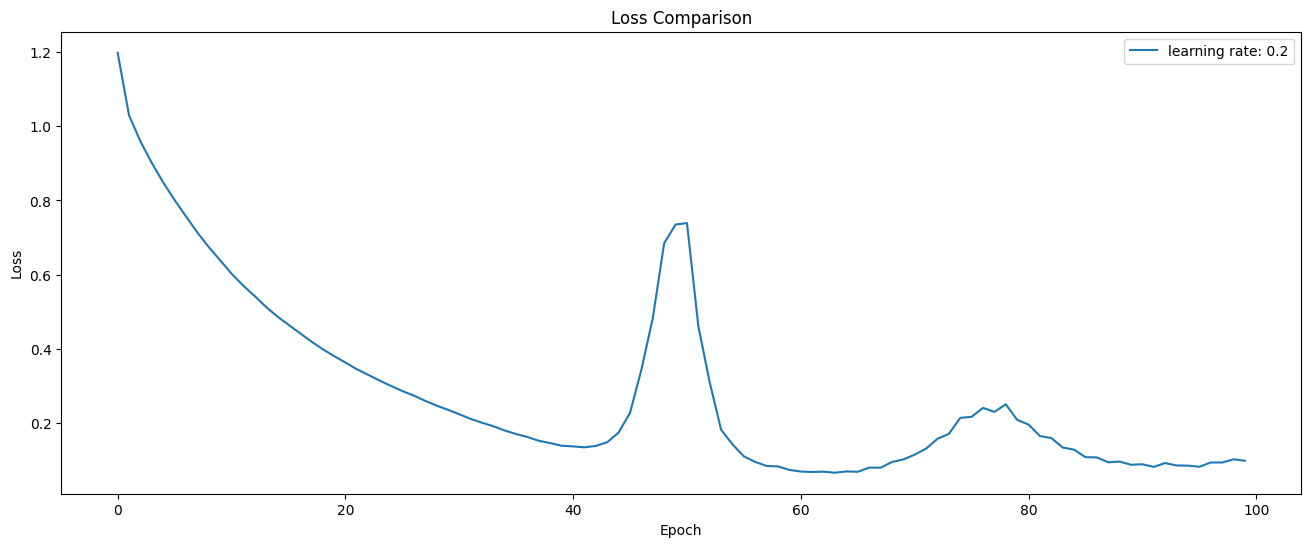

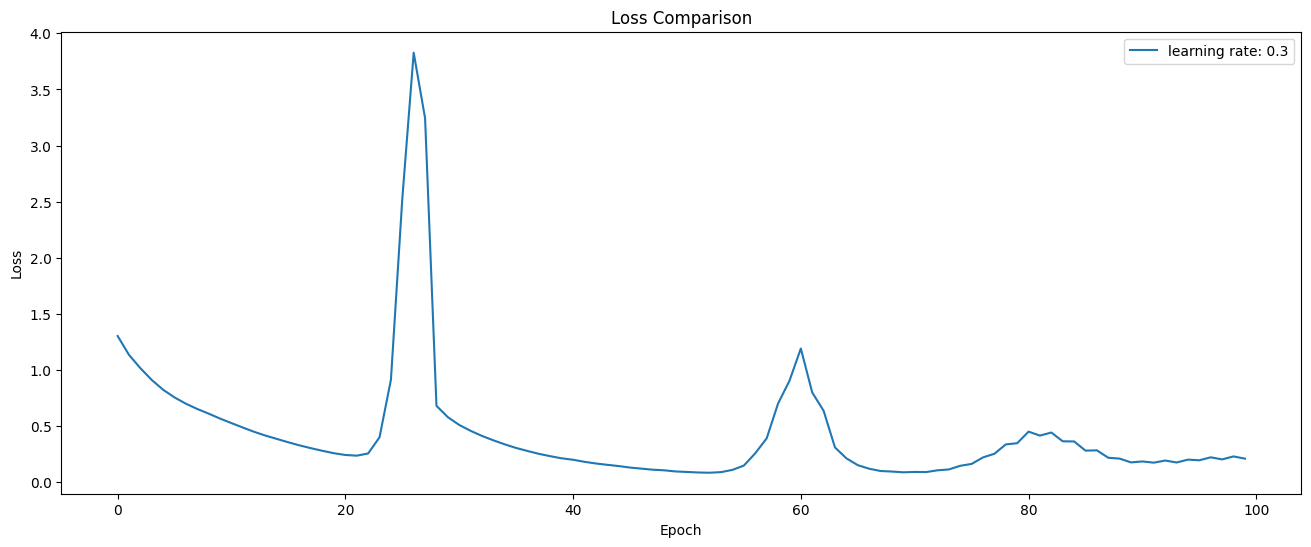

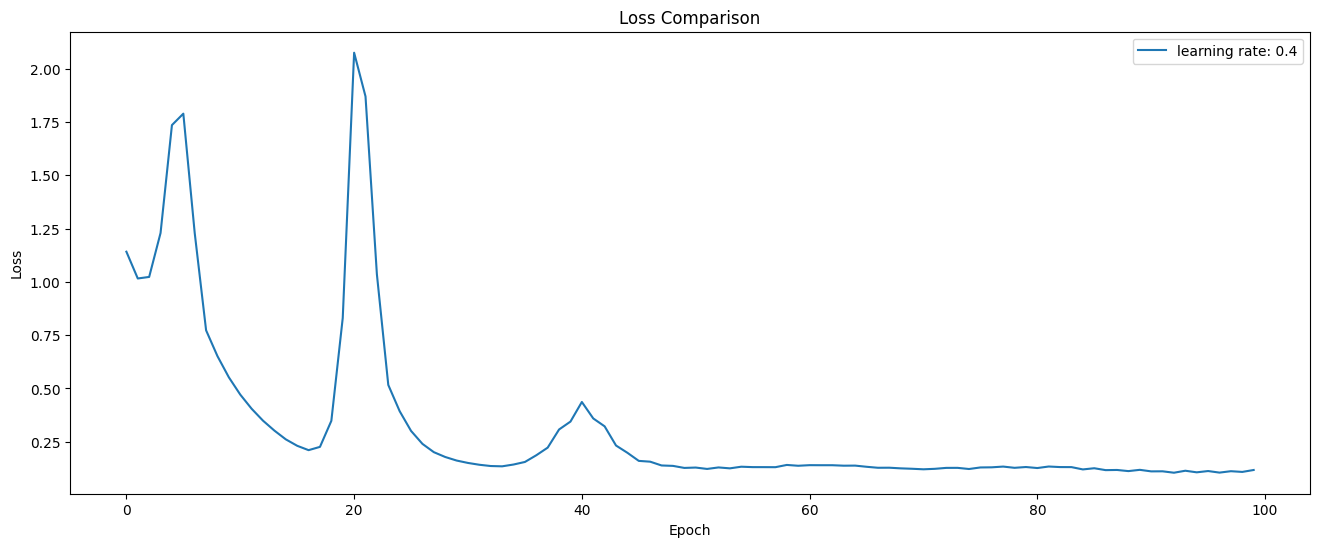

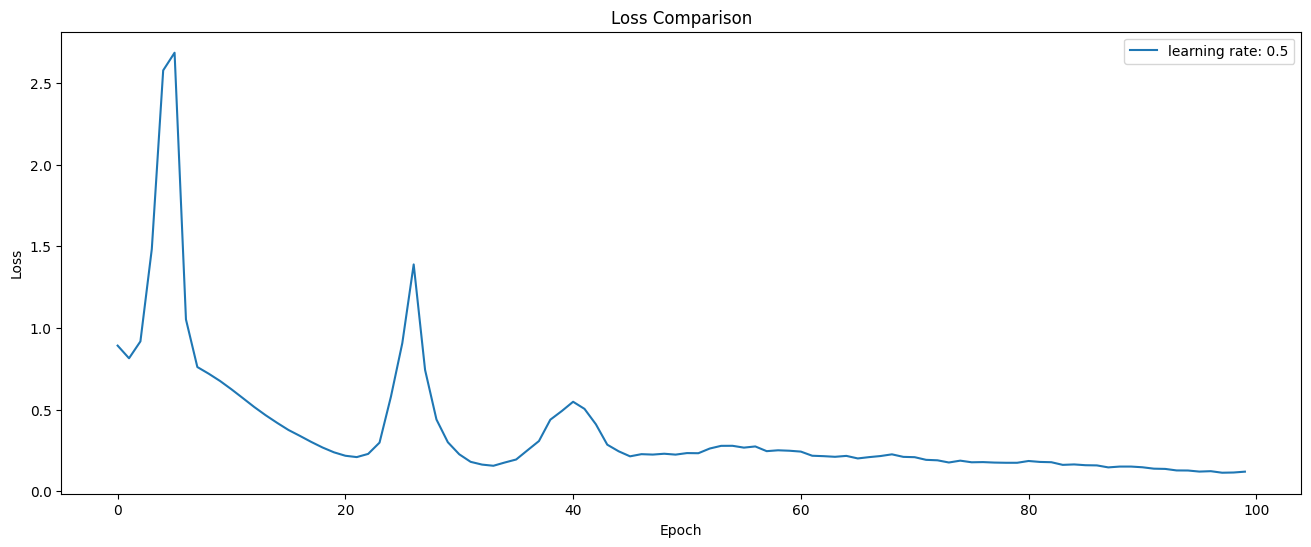

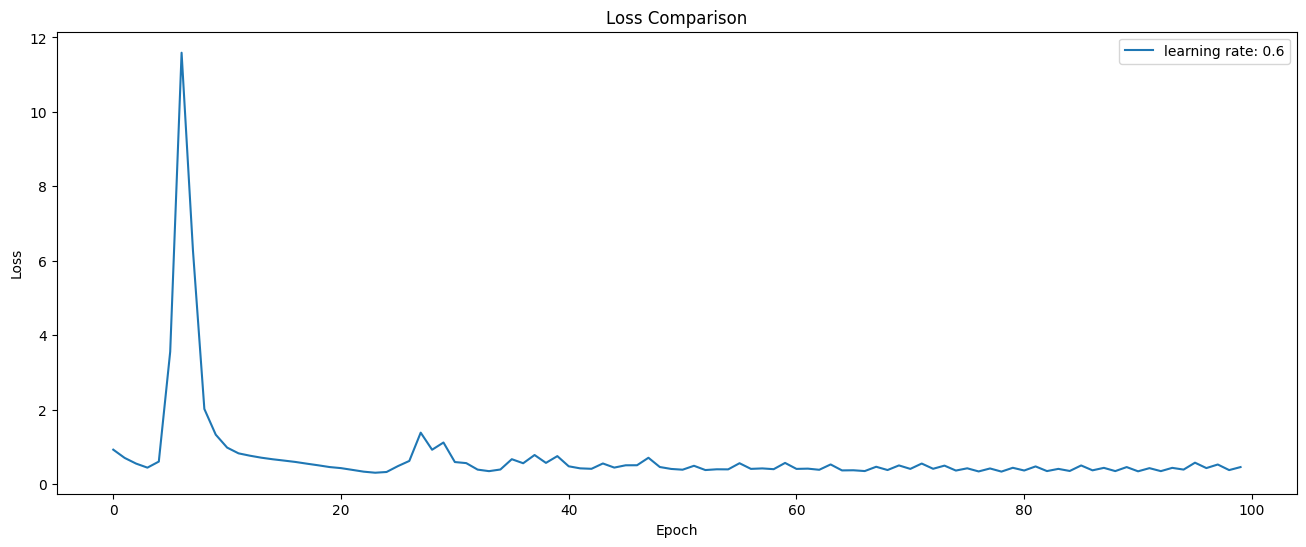

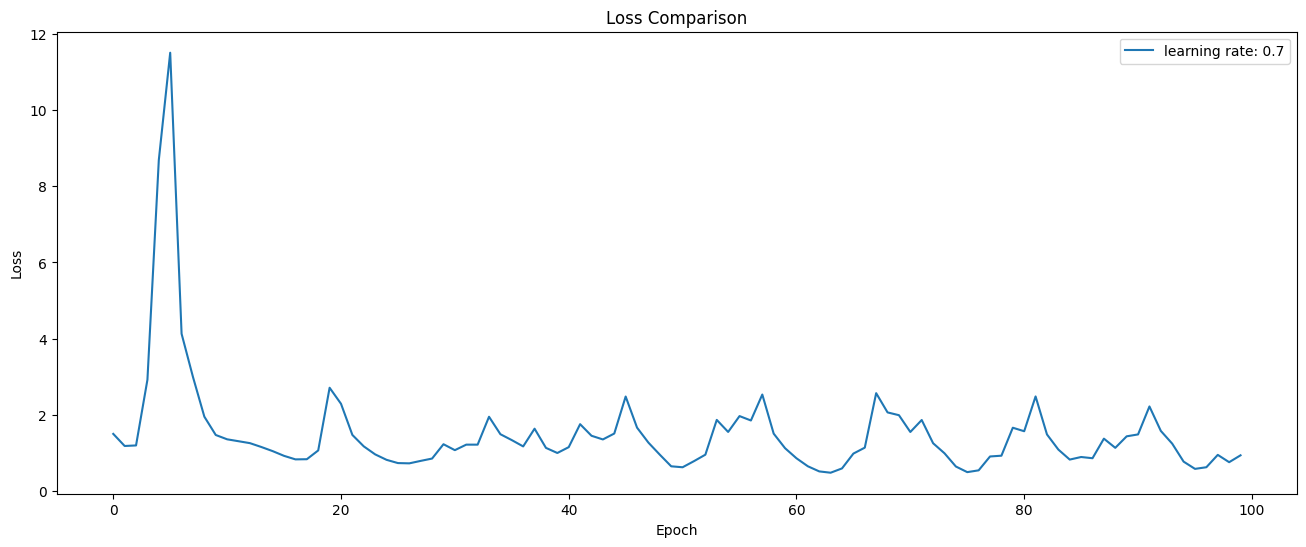

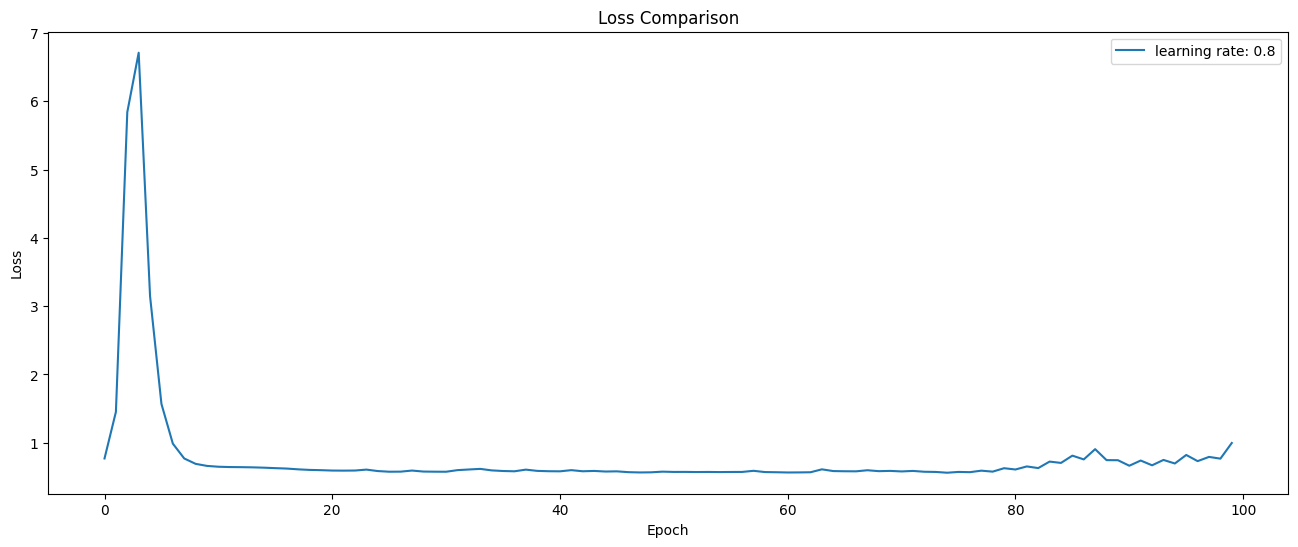

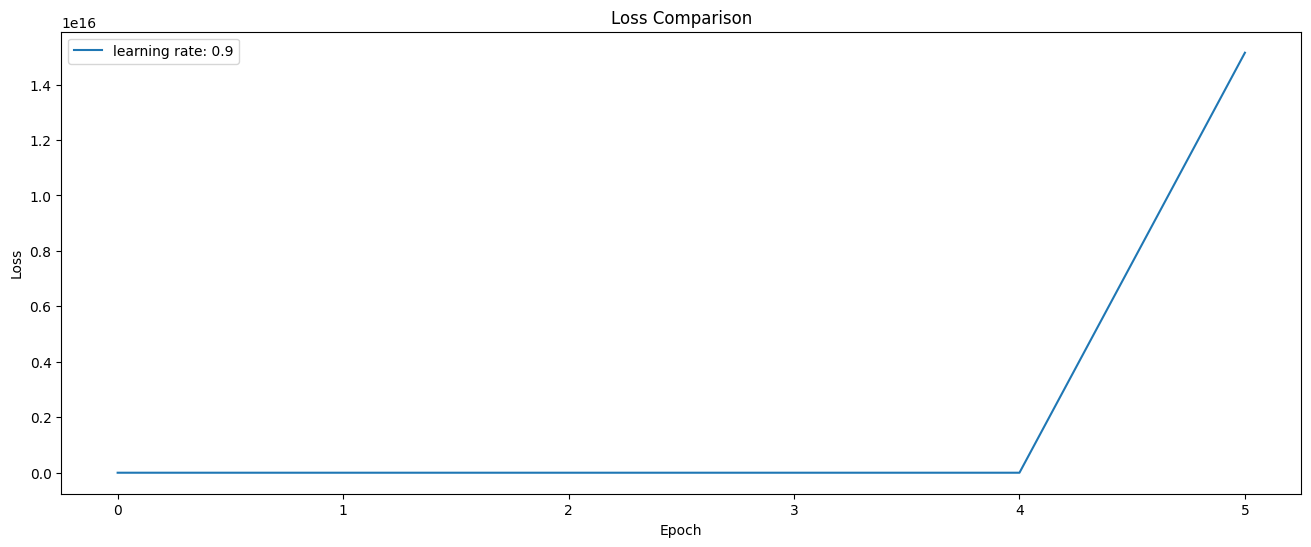

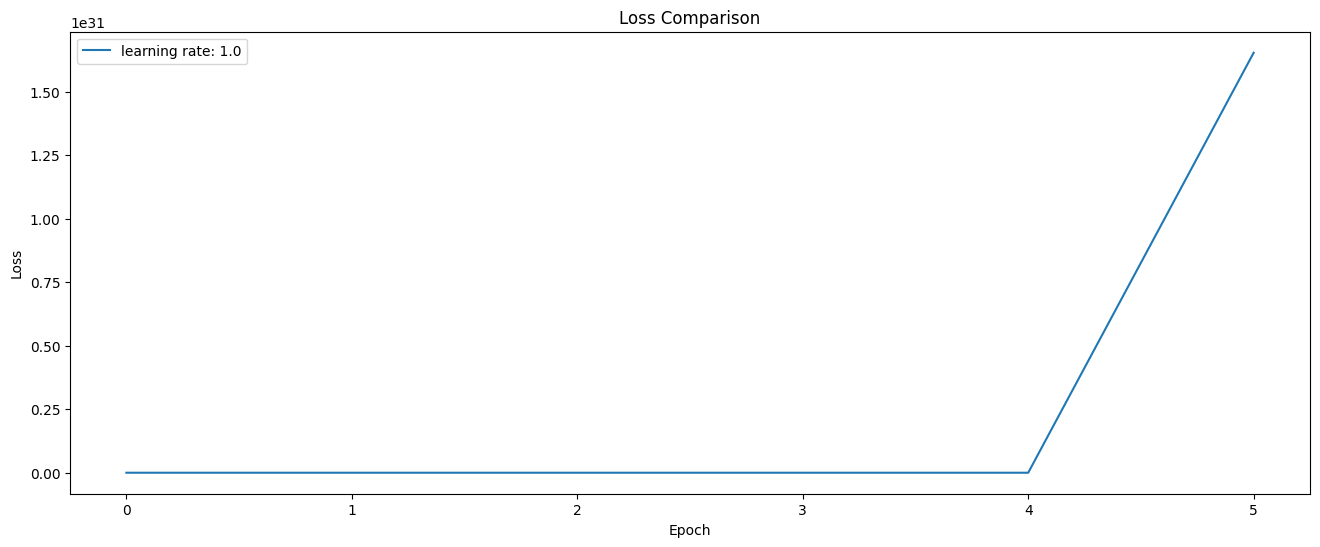

In [17]:
for i in range(0, len(learning_rates)):
    plt.figure(figsize=(16, 6))
    plt.plot(loss_values[i], label=f"learning rate: {learning_rates[i]}")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Comparison')
    plt.legend()
    plt.show()

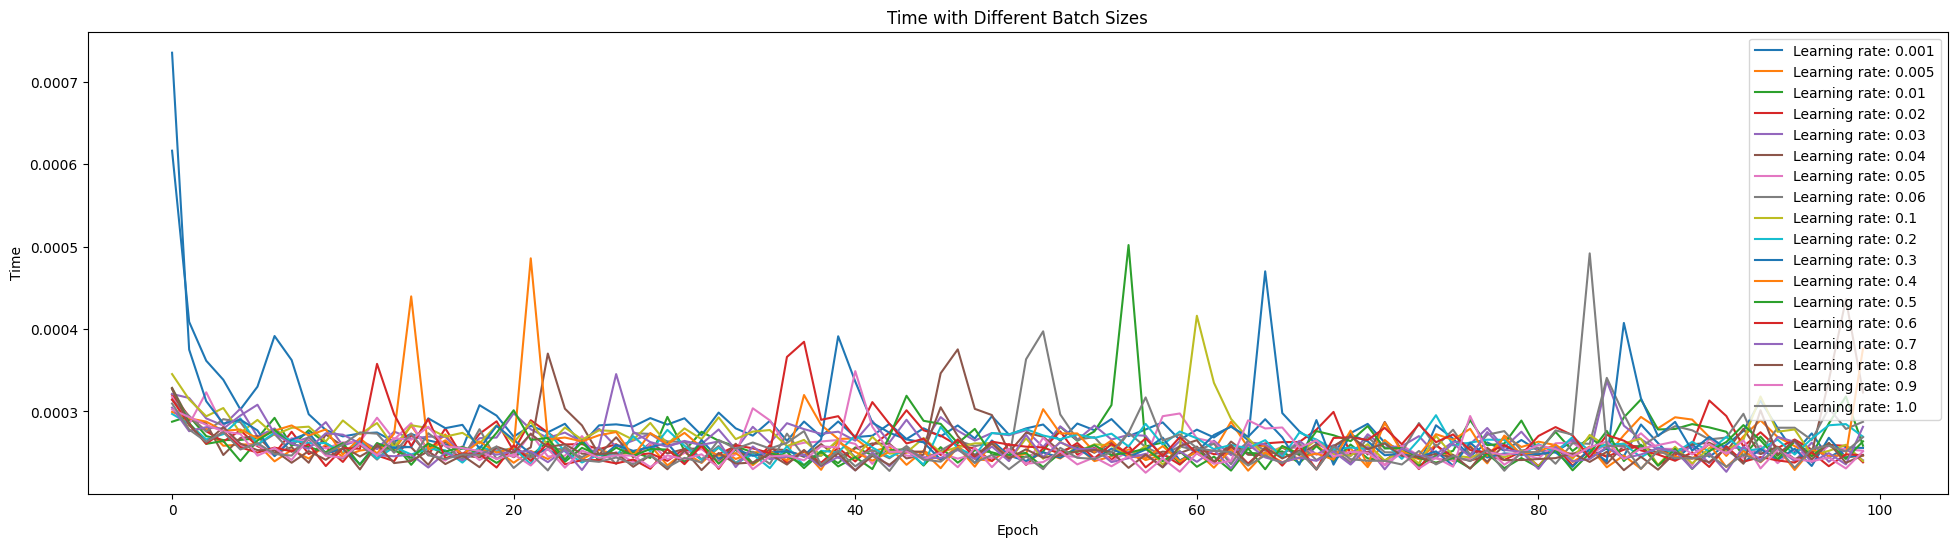

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 6))

for i in range(len(learning_rates)):
    plt.plot(time_values[i], label=f"Learning rate: {learning_rates[i]}")

plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Time with Different Batch Sizes')
plt.legend()
plt.show()

## `Experiment 3: Variety of Neural Network`

In [19]:
batch_size = 64
learning_rate = 0.01
network_architectures = [0, 1, 2]

time_values = []
loss_values = []

for network_architecture in network_architectures:
    loss, model, times = train_model(batch_size, learning_rate, network_architecture)
    loss_values.append(loss)
    time_values.append(times)

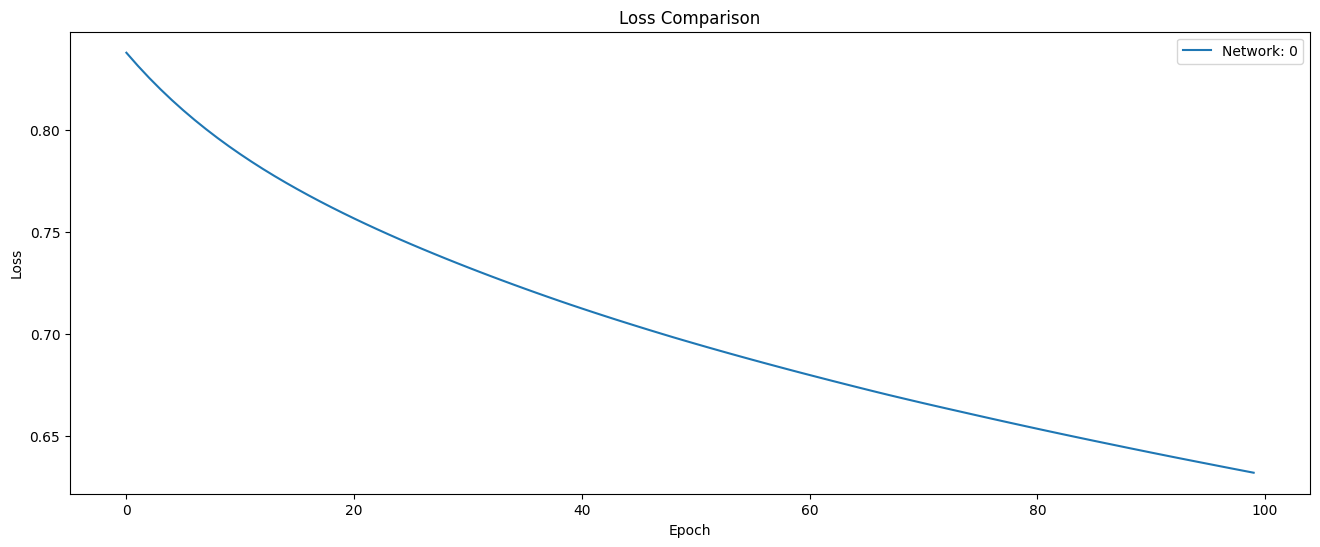

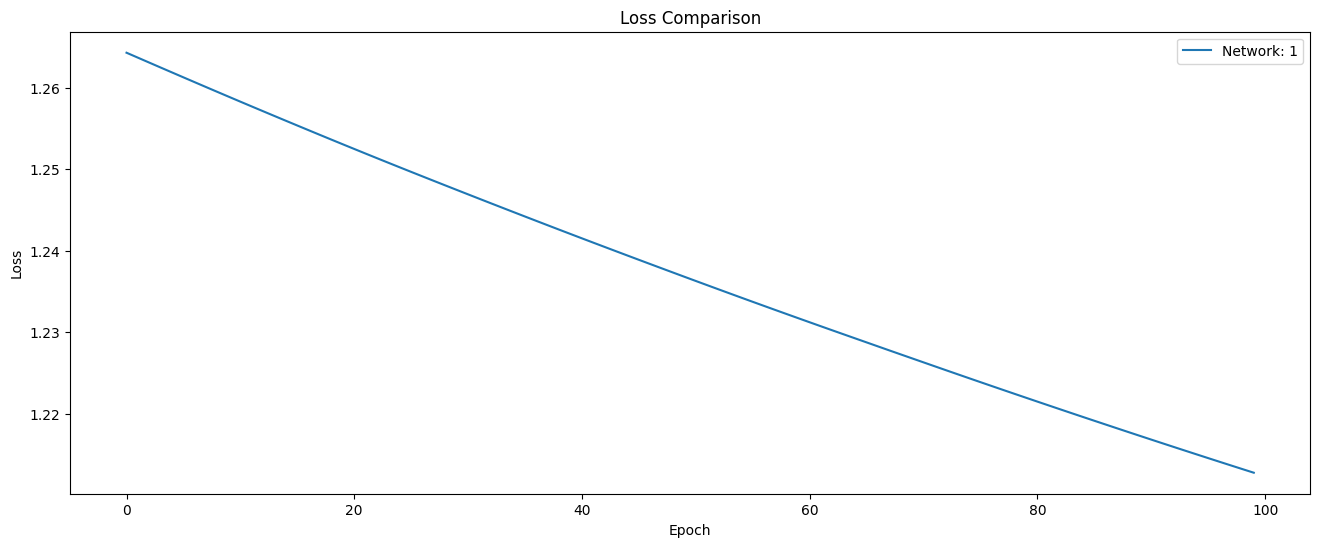

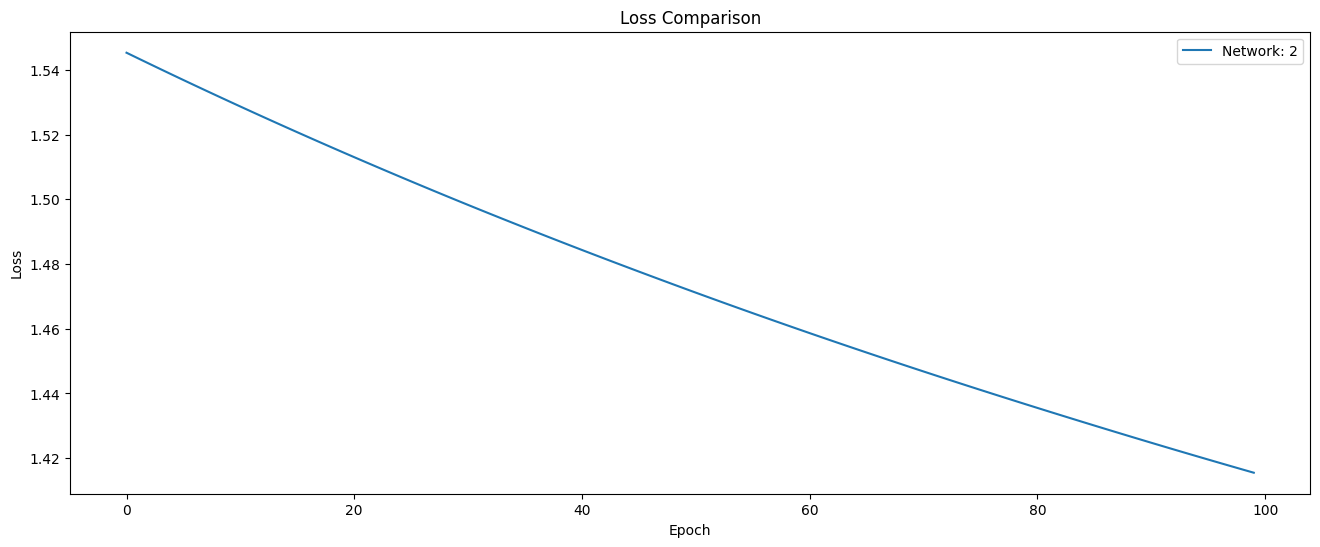

In [20]:
for i in range(0, len(network_architectures)):
    plt.figure(figsize=(16, 6))
    plt.plot(loss_values[i], label=f"Network: {network_architectures[i]}")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Comparison')
    plt.legend()
    plt.show()

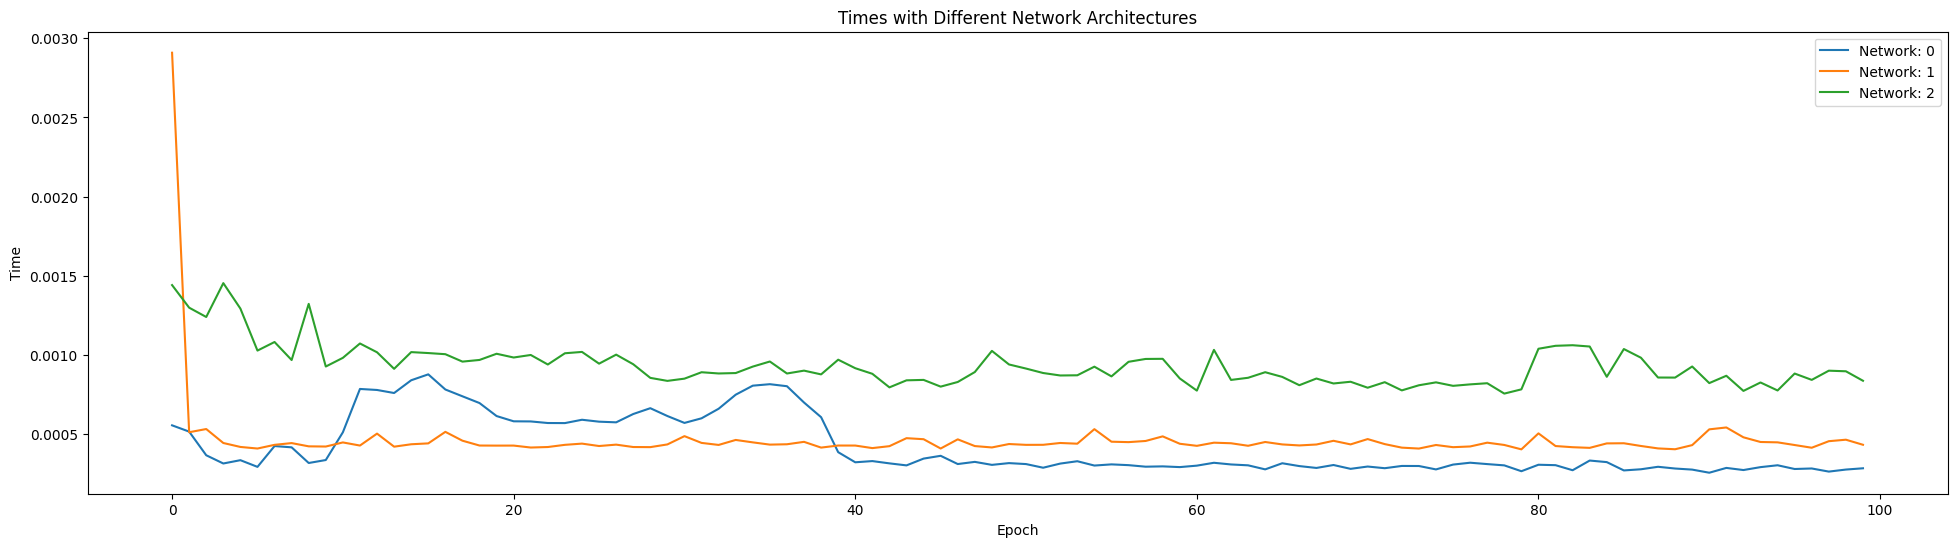

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 6))

for i in range(len(network_architectures)):
    plt.plot(time_values[i], label=f"Network: {network_architectures[i]}")

plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Times with Different Network Architectures')
plt.legend()
plt.show()